Завдання для Практичної Роботи з Теми "Computer Vision"
Мета:
Розробка та тренування конволюційної нейронної мережі (CNN) за допомогою TensorFlow для бінарної класифікації зображень їжі.

Дані:
Набір даних: 10_food_classes_all_data.zip, що містить зображення десяти різних класів їжі.

## Завдання:

1) Вибір Класів для Класифікації:

Використовуйте останню цифру свого номера у списку групи для вибору першого класу (наприклад, 1 для першого класу, 2 для другого, і так далі, з циклічним поверненням до 1 після 10).
Другий клас вибирається на основі суми цифр вашого номера у списку. Наприклад, якщо ваш номер - 12, сума цифр буде 1 + 2 = 3, тому другий клас буде 3-м у списку. Якщо сума перевищує 10, продовжуйте віднімати 10, доки не отримаєте число від 1 до 10.

2) Попередня Обробка Даних:

Завантажте та розпакуйте набір даних.
Поділіть дані на тренувальний та тестовий набори.
Виконайте необхідну попередню обробку даних (нормалізація, ресайзинг тощо).

3) Розробка Моделі CNN:

Створіть модель CNN за допомогою TensorFlow.
Ви можете експериментувати з різними архітектурами та гіперпараметрами.

4) Тренування та Оцінка Моделі:

Тренуйте модель на тренувальному наборі даних.
Оцініть ефективність моделі на тестовому наборі.
Запишіть результати точності та інші метрики ефективності.

5) Аналіз Результатів:

Проаналізуйте отримані результати.
Оцініть, наскільки ефективно модель розрізняє між обраними класами.
Обговоріть можливі шляхи покращення моделі.

Додаткові Вимоги:
Використовуйте TensorFlow для реалізації проекту.
Поділіть процес роботи на чіткі етапи.
Забезпечте чистоту та коментування коду.

In [ ]:
import zipfile
import os
from google.colab import drive
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense
import pandas as pd

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/'My Drive'/10_food_classes_all_data/10_food_classes_all_data.zip .

In [ ]:
!ls /content/gdrive/'My Drive'/10_food_classes_all_data

10_food_classes_all_data.zip  test  train


In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()
main_dir="10_food_classes_all_data"

In [ ]:
food_list = os.listdir("10_food_classes_all_data/train")
food_list.sort()
print(food_list)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


In [ ]:
for i in food_list:
  if i == 'grilled_salmon' or i == 'hamburger':
    print(i)
  else:
    folder_path = os.path.join("/content/10_food_classes_all_data/train", i)
    folder_path_2 = os.path.join("/content/10_food_classes_all_data/test", i)
    !rm -r $folder_path
    !rm -r $folder_path_2
food_list = os.listdir("10_food_classes_all_data/train")
print(food_list, " - train")
food_list_2 = os.listdir("10_food_classes_all_data/test")
print(food_list_2, " - test")

grilled_salmon
hamburger
['grilled_salmon', 'hamburger']  - train
['grilled_salmon', 'hamburger']  - test


In [ ]:
img_dir_1 = pathlib.Path('10_food_classes_all_data/train/grilled_salmon')
img_dir_2 = pathlib.Path('10_food_classes_all_data/train/hamburger')
filepaths_1 = list(img_dir_1.glob(r'*.jpg'))
filepaths_2 = list(img_dir_2.glob(r'*.jpg'))

(512, 512, 3)


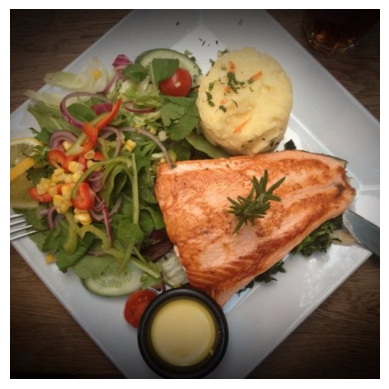

In [ ]:
img = mpimg.imread(filepaths_1[0])
plt.imshow(img)
plt.axis("off");
print(img.shape)

In [ ]:
tf.random.set_seed(42)
# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=30,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=3,
                            restore_best_weights=True
                        )
                    ])


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/30
47/47 [==============================] - 11s 196ms/step - loss: 0.6731 - accuracy: 0.6013 - val_loss: 0.6442 - val_accuracy: 0.6680
Epoch 2/30
47/47 [==============================] - 5s 116ms/step - loss: 0.6215 - accuracy: 0.6653 - val_loss: 0.6321 - val_accuracy: 0.6580
Epoch 3/30
47/47 [==============================] - 7s 147ms/step - loss: 0.5786 - accuracy: 0.6873 - val_loss: 0.5847 - val_accuracy: 0.7080
Epoch 4/30
47/47 [==============================] - 5s 115ms/step - loss: 0.5214 - accuracy: 0.7527 - val_loss: 0.5717 - val_accuracy: 0.6880
Epoch 5/30
47/47 [==============================] - 7s 151ms/step - loss: 0.4501 - accuracy: 0.7807 - val_loss: 0.6710 - val_accuracy: 0.6640
Epoch 6/30
47/47 [==============================] - 8s 161ms/step - loss: 0.3700 - accuracy: 0.8380 - val_loss: 0.6289 - val_accuracy: 0.6940
Epoch 7/30
47/47 [==============================] - 7s 146ms/ste

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

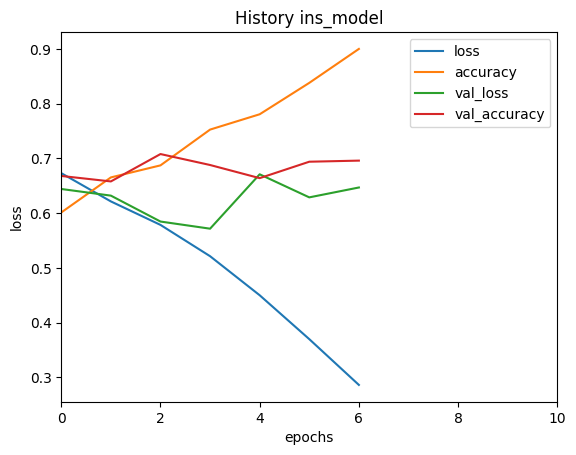

In [ ]:
pd.DataFrame(history_1.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,10))

In [ ]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=3,
                            restore_best_weights=True
                        )
                    ])

Epoch 1/50
47/47 [==============================] - 8s 152ms/step - loss: 0.6928 - accuracy: 0.5227 - val_loss: 0.6913 - val_accuracy: 0.5900
Epoch 2/50
47/47 [==============================] - 13s 275ms/step - loss: 0.6907 - accuracy: 0.5600 - val_loss: 0.6891 - val_accuracy: 0.5840
Epoch 3/50
47/47 [==============================] - 14s 292ms/step - loss: 0.6881 - accuracy: 0.5860 - val_loss: 0.6855 - val_accuracy: 0.6820
Epoch 4/50
47/47 [==============================] - 8s 167ms/step - loss: 0.6830 - accuracy: 0.6213 - val_loss: 0.6785 - val_accuracy: 0.6380
Epoch 5/50
47/47 [==============================] - 6s 119ms/step - loss: 0.6725 - accuracy: 0.6513 - val_loss: 0.6662 - val_accuracy: 0.6460
Epoch 6/50
47/47 [==============================] - 8s 161ms/step - loss: 0.6566 - accuracy: 0.6360 - val_loss: 0.6533 - val_accuracy: 0.6320
Epoch 7/50
47/47 [==============================] - 5s 113ms/step - loss: 0.6405 - accuracy: 0.6420 - val_loss: 0.6312 - val_accuracy: 0.6620
Epoc

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

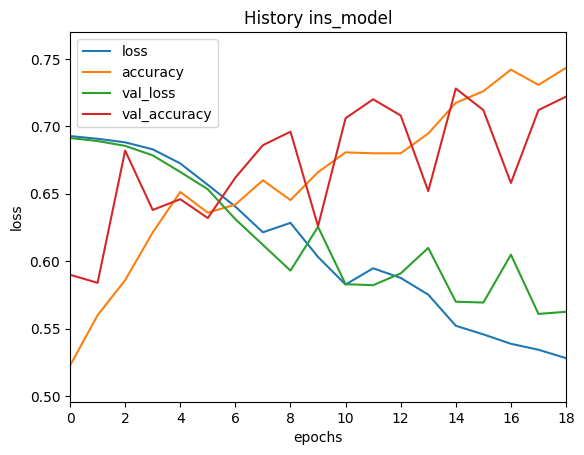

In [ ]:
pd.DataFrame(history_2.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,18))

In [ ]:
model_6 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data,
                        epochs=30,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=3,
                            restore_best_weights=True
                        )
                    ])



Epoch 1/30
47/47 [==============================] - 11s 213ms/step - loss: 0.6928 - accuracy: 0.5227 - val_loss: 0.6928 - val_accuracy: 0.5300
Epoch 2/30
47/47 [==============================] - 6s 130ms/step - loss: 0.6916 - accuracy: 0.5527 - val_loss: 0.6917 - val_accuracy: 0.5240
Epoch 3/30
47/47 [==============================] - 11s 226ms/step - loss: 0.6902 - accuracy: 0.5687 - val_loss: 0.6903 - val_accuracy: 0.5900
Epoch 4/30
47/47 [==============================] - 11s 217ms/step - loss: 0.6880 - accuracy: 0.6067 - val_loss: 0.6879 - val_accuracy: 0.5560
Epoch 5/30
47/47 [==============================] - 6s 132ms/step - loss: 0.6841 - accuracy: 0.6040 - val_loss: 0.6842 - val_accuracy: 0.5960
Epoch 6/30
47/47 [==============================] - 7s 151ms/step - loss: 0.6792 - accuracy: 0.6073 - val_loss: 0.6768 - val_accuracy: 0.6300
Epoch 7/30
47/47 [==============================] - 6s 134ms/step - loss: 0.6700 - accuracy: 0.6307 - val_loss: 0.6691 - val_accuracy: 0.6160
Epo

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

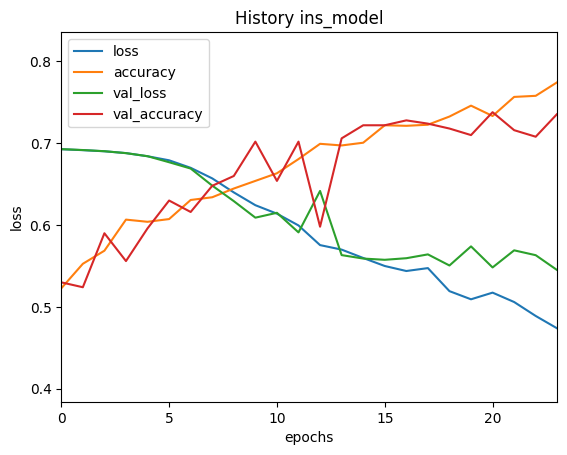

In [ ]:
pd.DataFrame(history_6.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,23))

In [ ]:
model_x = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_x.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
history_x = model_x.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=2,
                            restore_best_weights=True
                        )
                    ])

Epoch 1/50
47/47 [==============================] - 6s 118ms/step - loss: 0.6940 - accuracy: 0.4913 - val_loss: 0.6928 - val_accuracy: 0.5340
Epoch 2/50
47/47 [==============================] - 7s 158ms/step - loss: 0.6922 - accuracy: 0.5187 - val_loss: 0.6910 - val_accuracy: 0.5680
Epoch 3/50
47/47 [==============================] - 7s 149ms/step - loss: 0.6889 - accuracy: 0.5480 - val_loss: 0.6881 - val_accuracy: 0.5700
Epoch 4/50
47/47 [==============================] - 8s 163ms/step - loss: 0.6837 - accuracy: 0.5933 - val_loss: 0.6822 - val_accuracy: 0.5460
Epoch 5/50
47/47 [==============================] - 6s 136ms/step - loss: 0.6737 - accuracy: 0.5993 - val_loss: 0.6735 - val_accuracy: 0.6060
Epoch 6/50
47/47 [==============================] - 7s 155ms/step - loss: 0.6644 - accuracy: 0.6080 - val_loss: 0.6647 - val_accuracy: 0.6100
Epoch 7/50
47/47 [==============================] - 6s 117ms/step - loss: 0.6461 - accuracy: 0.6367 - val_loss: 0.6417 - val_accuracy: 0.6560
Epoch 

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

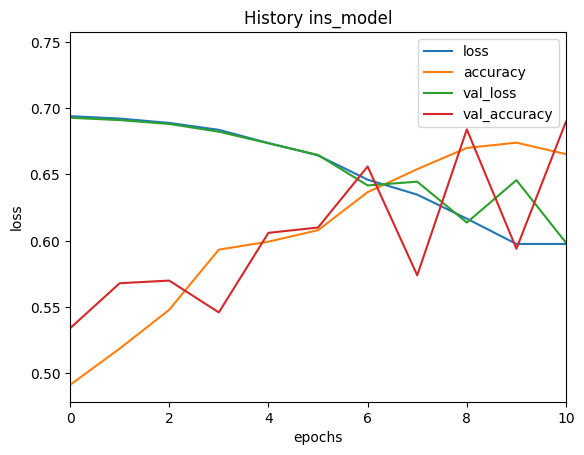

In [ ]:
pd.DataFrame(history_x.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,10))

Epoch 1/10
47/47 [==============================] - 8s 125ms/step - loss: 0.6946 - accuracy: 0.5347 - val_loss: 0.6729 - val_accuracy: 0.6240
Epoch 2/10
47/47 [==============================] - 5s 112ms/step - loss: 0.6588 - accuracy: 0.6127 - val_loss: 0.6457 - val_accuracy: 0.6000
Epoch 3/10
47/47 [==============================] - 7s 159ms/step - loss: 0.6199 - accuracy: 0.6527 - val_loss: 0.6021 - val_accuracy: 0.7040
Epoch 4/10
47/47 [==============================] - 5s 109ms/step - loss: 0.5853 - accuracy: 0.6853 - val_loss: 0.6022 - val_accuracy: 0.6500
Epoch 5/10
47/47 [==============================] - 7s 141ms/step - loss: 0.5450 - accuracy: 0.7153 - val_loss: 0.5846 - val_accuracy: 0.7100
Epoch 6/10
47/47 [==============================] - 6s 131ms/step - loss: 0.5198 - accuracy: 0.7313 - val_loss: 0.5613 - val_accuracy: 0.7080
Epoch 7/10
47/47 [==============================] - 5s 114ms/step - loss: 0.4714 - accuracy: 0.7747 - val_loss: 0.5841 - val_accuracy: 0.7140
Epoch 

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

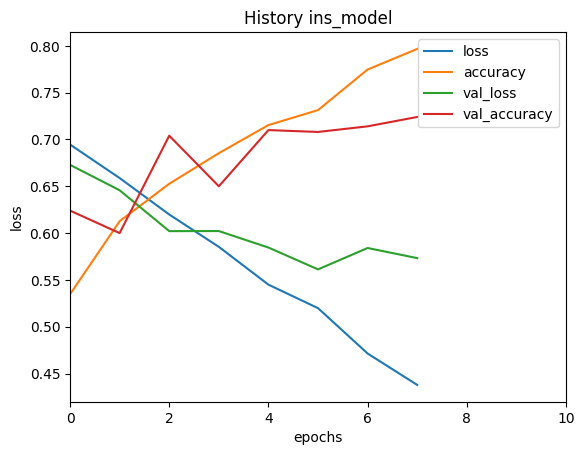

In [ ]:
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=2,
                            restore_best_weights=True
                        )
                    ])

pd.DataFrame(history_10.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,10))